In [1]:
!pip install EoN



In [2]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random

generating graph G with 1000000 nodes
doing event-based simulation


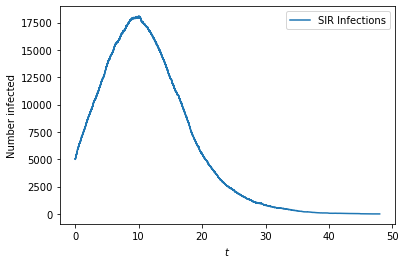

In [7]:
N = 10**6 # number of people to consider
kave = 5 # expected number of partners
print("generating graph G with {} nodes".format(N))
G = nx.fast_gnp_random_graph(N, kave/(N-1)) #Erdo’’s-Re’nyi graph
rho = 0.005 #initial fraction infected
tau = 0.3 #transmission rate
gamma = 1.0 #recovery rate
print("doing event-based simulation")
t1, S1, I1, R1 = EoN.fast_SIR(G, tau, gamma, rho=rho)

plt.plot(t1, I1, label = 'SIR Infections')
plt.xlabel("$t$")
plt.ylabel("Number infected")
plt.legend()
plt.show()


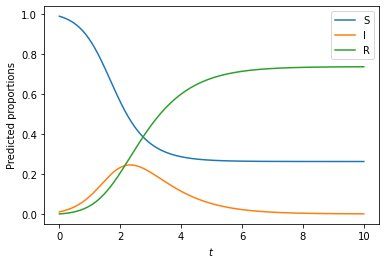

In [4]:

gamma = 1
tau = 1.5
kave = 3
rho = 0.01
phiS0 = 1-rho
def psi(x):
    return (1-rho)* np.exp(-kave*(1-x))
def psiPrime(x):
    return (1-rho)*kave*np.exp(-kave*(1-x))
N=1
t, S, I, R = EoN.EBCM(N, psi, psiPrime, tau, gamma, phiS0, tmax = 10)
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('$t$')
plt.ylabel('Predicted proportions')
plt.legend()
plt.show()


generating graph G with 100000 nodes
doing Gillespie simulation
done with simulation, now plotting


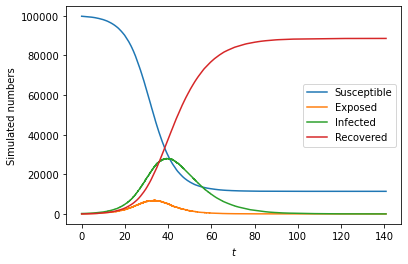

In [5]:
N = 100000
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, 5./(N-1))
#We add random variation in the rate of leaving exposed class
#and in the partnership transmission rate.
#There is no variation in recovery rate.
node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}
nx.set_node_attributes(G, values=node_attribute_dict,
name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict,
name='transmission_weight')
#
#These individual and partnership attributes will be used to scale
#the transition rates. When we define \texttt{H} and \texttt{J}, we provide the name
#of these attributes.

#More advanced techniques to scale the transmission rates are shown in
#the online documentation
H = nx.DiGraph() #For the spontaneous transitions
H.add_node('S') #This line is actually unnecessary.
H.add_edge('E', 'I', rate = 0.6, weight_label='expose2infect_weight')
H.add_edge('I', 'R', rate = 0.1)
J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.1,
weight_label='transmission_weight')
IC = defaultdict(lambda: 'S')
for node in range(200):
    IC[node] = 'I'
return_statuses = ('S', 'E', 'I', 'R')
print('doing Gillespie simulation')
t, S, E, I, R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses,
tmax = float('Inf'))
print('done with simulation, now plotting')
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, E, label = 'Exposed')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
plt.xlabel('$t$')
plt.ylabel('Simulated numbers')
plt.legend()
plt.show()


generating graph G with 300000 nodes
doing Gillespie simulation


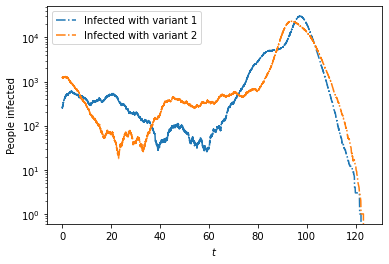

In [10]:
N = 300000
print('generating graph G with {} nodes'.format(N))
G = nx.fast_gnp_random_graph(N, 5./(N-1))

H = nx.DiGraph() #DiGraph showing spontaneous transitions

H.add_node('SS') 
H.add_edge('SI', 'SR', rate = 1) 
H.add_edge('IS', 'RS', rate = 1)
H.add_edge('II', 'IR', rate = 0.5)
H.add_edge('II', 'RI', rate = 0.5)
H.add_edge('IR', 'RR', rate = 0.5)
H.add_edge('RI', 'RR', rate = 0.5)

J = nx.DiGraph() #DiGraph showing induced transitions (require interaction).
J.add_edge(('SI', 'SS'), ('SI', 'SI'), rate = 0.18)
J.add_edge(('SI', 'IS'), ('SI', 'II'), rate = 0.18)
J.add_edge(('SI', 'RS'), ('SI', 'RI'), rate = 0.18)
J.add_edge(('II', 'SS'), ('II', 'SI'), rate = 0.18)
J.add_edge(('II', 'IS'), ('II', 'II'), rate = 0.18)
J.add_edge(('II', 'RS'), ('II', 'RI'), rate = 0.18)
J.add_edge(('RI', 'SS'), ('RI', 'SI'), rate = 1)
J.add_edge(('RI', 'IS'), ('RI', 'II'), rate = 1)
J.add_edge(('RI', 'RS'), ('RI', 'RI'), rate = 1)
J.add_edge(('IS', 'SS'), ('IS', 'IS'), rate = 0.18)
J.add_edge(('IS', 'SI'), ('IS', 'II'), rate = 0.18)
J.add_edge(('IS', 'SR'), ('IS', 'IR'), rate = 0.18)
J.add_edge(('II', 'SS'), ('II', 'IS'), rate = 0.18)
J.add_edge(('II', 'SI'), ('II', 'II'), rate = 0.18)
J.add_edge(('II', 'SR'), ('II', 'IR'), rate = 0.18)
J.add_edge(('IR', 'SS'), ('IR', 'IS'), rate = 1)
J.add_edge(('IR', 'SI'), ('IR', 'II'), rate = 1)
J.add_edge(('IR', 'SR'), ('IR', 'IR'), rate = 1)
return_statuses = ('SS', 'SI', 'SR', 'IS', 'II', 'IR', 'RS', 'RI', 'RR')
initial_size = 250
IC = defaultdict(lambda: 'SS')

for individual in range(initial_size):
    IC[individual] = 'II'
for individual in range(initial_size, 5*initial_size): 
#the 2nd variant
    IC[individual] = 'SI'
print('doing Gillespie simulation')
t, SS, SI, SR, IS, II, IR, RS, RI, RR = EoN.Gillespie_simple_contagion(G, H,
J, IC, return_statuses,
tmax = float('Inf'))
plt.semilogy(t, IS+II+IR, '-.', label = 'Infected with variant 1')
plt.semilogy(t, SI+II+RI, '-.', label = 'Infected with variant 2')
plt.xlabel('$t$')
plt.ylabel('People infected')
plt.legend()
plt.show()
